# Linear Regression with Python

We will be working with a Housing Dataset based from USA

We'll be trying to predict the price of the houses in the area
Let's begin our understanding of implementing Logistic Regression in Python for classification.

This data set contains the following features:

* 'Avg. Area Income': Average income of the people in the area
* 'Avg. Area House Age': Average age of the houses in the area 
* 'Avg. Area Number of Rooms': Average number of rooms 
* 'Avg. Area Number of Bedrooms': Average number of bedrooms in the area
* 'Area Population': Population of the Area
* 'Address': Address of the Area
* 'Price': Price of the Houses in the area

In [1]:
# Importing Packages
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import metrics

In [2]:
# Import CSV Package
dataframe = pd.read_csv("/Users/devangpapinwar/Downloads/Refactored_Py_DS_ML_Bootcamp-master/11-Linear-Regression/USA_Housing.csv")
print(dataframe)

      Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0         79545.458574             5.682861                   7.009188   
1         79248.642455             6.002900                   6.730821   
2         61287.067179             5.865890                   8.512727   
3         63345.240046             7.188236                   5.586729   
4         59982.197226             5.040555                   7.839388   
...                ...                  ...                        ...   
4995      60567.944140             7.830362                   6.137356   
4996      78491.275435             6.999135                   6.576763   
4997      63390.686886             7.250591                   4.805081   
4998      68001.331235             5.534388                   7.130144   
4999      65510.581804             5.992305                   6.792336   

      Avg. Area Number of Bedrooms  Area Population         Price  \
0                             4.09     230

In [3]:
# Getting Basic data about the Dataframe
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [4]:
# Getting Numerical Stats and data about the Dataframe
dataframe.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [5]:
# Gets the Column labels
dataframe.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [6]:
# Gets the first 5 Dataframe elements
dataframe.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

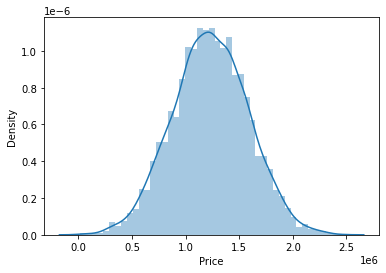

In [7]:
# Shows the unvariate distribution of observations via a histogram
sb.distplot(dataframe['Price'])

<AxesSubplot:>

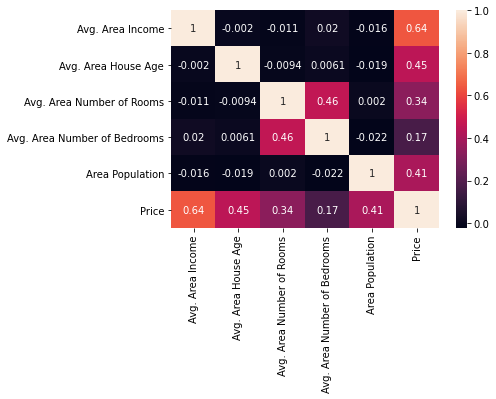

In [8]:
# Gets the heatmap of correlation which quantifies the strength of the linear relationship between a pair of variables
sb.heatmap(dataframe.corr() , annot = True)

In [10]:
# Creating Seperate Dataframes for Test Data and Response Data
X = dataframe[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms','Avg. Area Number of Bedrooms', 'Area Population']]
y = dataframe['Price']

In [11]:
from sklearn.model_selection import train_test_split 

# Split the Dataset into Test Data and Train Data
X_train , X_test , Y_train , Y_test = train_test_split(X , y , test_size = 0.4 , random_state = 101)

In [12]:
# Instantiate Linear Regression and fit the the Training Data into the model
regression = linear_model.LinearRegression()
regression.fit(X_train , Y_train)

LinearRegression()

In [13]:
# https://www.theanalysisfactor.com/interpreting-the-intercept-in-a-regression-model/
# Get the Intercept and Coefficient values from the regression model
print(regression.intercept_)
print(regression.coef_)

-2640159.7968526776
[2.15282755e+01 1.64883282e+05 1.22368678e+05 2.23380186e+03
 1.51504200e+01]


In [14]:
# Creating a Dataframe for User info
coefficents = pd.DataFrame(regression.coef_ , X.columns , columns = ['Co-Efficients'])
coefficents

,Co-Efficients
Avg. Area Income,21.528276
Avg. Area House Age,164883.282027
Avg. Area Number of Rooms,122368.678027
Avg. Area Number of Bedrooms,2233.801864
Area Population,15.150420


In [15]:
# Making predictions based on the Test Data
predictions = regression.predict(X_test)
predictions

array([1260960.70567627,  827588.75560329, 1742421.24254344, ...,
        372191.40626917, 1365217.15140899, 1914519.5417888 ])

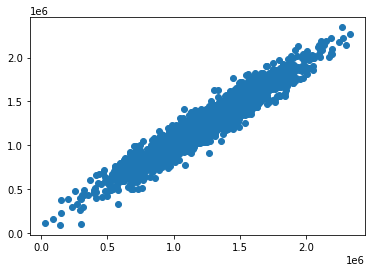

In [16]:
# Visualise the Data Test Data and predictions made
plt.scatter(Y_test , predictions)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

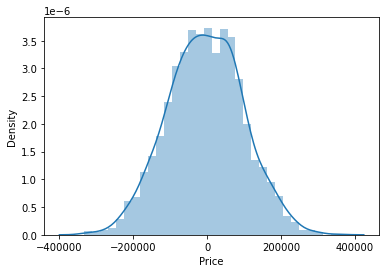

In [17]:
# Used to visualise the parametric distribution of a dataframe
sb.distplot((Y_test-predictions))

In [18]:
# Calculating the Errors
metrics.mean_absolute_error(Y_test , predictions)
metrics.mean_squared_error(Y_test , predictions)

10460958907.208994